## 필요한 패키지 import

In [1]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

🌫🛸


### 사진 불러오기

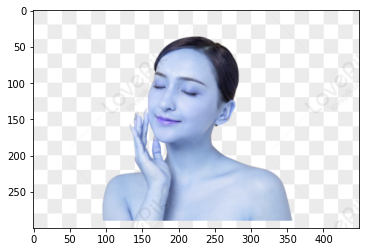

In [2]:
my_image_path = '/aiffel/aiffel/AIFFEL_quest_rs/Exploration/Ex03/images/tilted_face.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

### RGB로 바꾸기

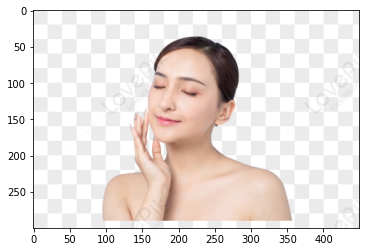

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

### detector 선언, bounding box 추출

In [4]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

### 찾은 얼굴 출력

rectangles[[(139, 68) (247, 175)]]


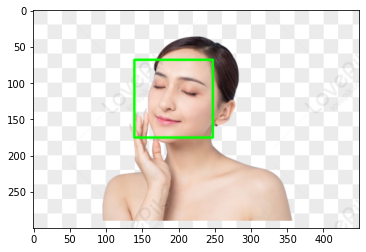

In [5]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 저장한 랜드마크 모델 불러오기

In [6]:
model_path = '/aiffel/aiffel/AIFFEL_quest_rs/Exploration/Ex03/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


### 각 얼굴마다 모든 랜드마크 저장

In [7]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


### 랜드마크 출력

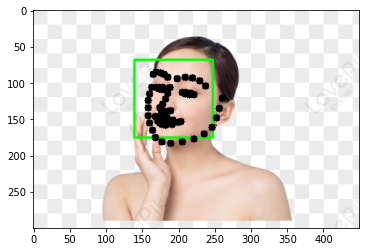

In [8]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 0, 0), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 5고 (0, 0, 0)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

### x, y로 코의 위치, w, h로 얼굴의 넓이 구하기

In [9]:
# xs = []
# ys = []
# whs = []

# for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
#     print (landmark[30]) # 코의 index는 30 입니다
#     x = landmark[30][0] # 이미지에서 코 부위의 x값
#     y = landmark[30][1] # 이미지에서 코 부위의 y값
#     xs.append(x)
#     ys.append(y)
#     w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
#     whs.append(w)
#     print (f'(x,y) : ({x},{y})')
#     print (f'(w,h) : ({w},{h})')

xs = []
ys = []
whs = []

rolls = []   # 좌우 기울기
yaws = []    # 좌우 회전
pitches = [] # 위아래 기울기

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]  # 코 x
    y = landmark[30][1]  # 코 y
    xs.append(x)
    ys.append(y)

    w = h = dlib_rect.width()
    whs.append(w)

    # roll 계산 (좌우 기울기): 양 눈 기울기
    left_eye = landmark[36]  # 왼쪽 눈 바깥쪽
    right_eye = landmark[45]  # 오른쪽 눈 바깥쪽
    dx = right_eye[0] - left_eye[0]
    dy = right_eye[1] - left_eye[1]
    roll = np.degrees(np.arctan2(dy, dx))
    rolls.append(roll)

    # yaw 계산 (좌우 회전): 코가 얼굴 중심에서 얼마나 치우쳤는지
    face_center_x = (dlib_rect.left() + dlib_rect.right()) / 2
    nose_x = landmark[30][0]
    yaw = (nose_x - face_center_x) / w  # 상대 위치로 정규화
    yaws.append(yaw)

    # pitch 계산 (위아래 기울기): 눈-코-턱의 y좌표 간격
    eye_avg_y = (landmark[36][1] + landmark[45][1]) / 2
    nose_y = landmark[30][1]
    chin_y = landmark[8][1]
    eye_to_nose = nose_y - eye_avg_y
    nose_to_chin = chin_y - nose_y
    pitch = (eye_to_nose - nose_to_chin) / h  # 정규화
    pitches.append(pitch)

    print(f'(x, y): ({x}, {y})')
    print(f'(w, h): ({w}, {h})')
    print(f'roll (좌우 기울기): {roll:.2f}°')
    print(f'yaw (좌우 회전): {yaw:.2f}')
    print(f'pitch (위아래 기울기): {pitch:.2f}')

(x, y): (178, 129)
(w, h): (109, 109)
roll (좌우 기울기): 11.09°
yaw (좌우 회전): -0.14
pitch (위아래 기울기): -0.31


### 고양이 수염 스티커 가져오기

In [10]:
sticker_path = '/aiffel/aiffel/AIFFEL_quest_rs/Exploration/Ex03/images/cat-whiskers.png' # 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다.\
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(109, 109, 3)


### 수염 위치 조정

In [11]:
# refined_xs = []
# refined_ys = []
# stickers = []
# real_sticker = img_sticker

# for x, y, w in zip(xs, ys, whs):
#     img_sticker = real_sticker
#     refined_x = x - w // 2
#     refined_y = y - w // 2
#     refined_xs.append(refined_x)
#     refined_ys.append(refined_y)
#     # 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
#     # 즉, refined_x, refined_y값에서 수염 이미지가 시작됨
#     print (f'(x,y) : ({refined_x},{refined_y})')

#     # 아래 코드는 스티커가 원본 사진 밖으로 나가는 경우, 스티커를 자르는 코드
#     # 수염 이미지가 왼쪽으로 나가는 경우
#     if refined_x < 0: 
#         img_sticker = img_sticker[:, -refined_x:]
#         refined_x = 0
#     # 수염 이미지가 위쪽으로 나가는 경우
#     if refined_y < 0:
#         img_sticker = img_sticker[-refined_y:, :]
#         refined_y = 0

#     # 잘린 수염 이미지 크기로 재정비
#     h_, w_ = img_sticker.shape[:2]
#     height, width = img_bgr.shape[:2]

#     # 수염 이미지가 오른쪽으로 나가는 경우
#     if refined_x + w_ > width:
#         overflow = refined_x + w_ - width
#         img_sticker = img_sticker[:, :-overflow]
#         w_ = img_sticker.shape[1]  # 다시 갱신

#     # 수염 이미지가 아래쪽으로 나가는 경우
#     if refined_y + h_ > height:
#         overflow = refined_y + h_ - height
#         img_sticker = img_sticker[:-overflow, :]
#         h_ = img_sticker.shape[0]  # 다시 갱신

#     stickers.append(img_sticker)
#     print (f'(x,y) : ({refined_x},{refined_y})')

refined_xs = []
refined_ys = []
stickers = []
real_sticker = img_sticker

for x, y, w, roll, yaw, pitch in zip(xs, ys, whs, rolls, yaws, pitches):
    img_sticker = real_sticker.copy()
    
     # 크기 조정: yaw에 따라 좌우 길이, pitch에 따라 위아래 길이 변경 (비율 기준)
    yaw_scale = 1 - min(max(yaw, -0.3), 0.3)  # -0.3~0.3 정도 범위로 제한
    pitch_scale = 1 - min(max(pitch, -0.3), 0.3)
    new_w = int(img_sticker.shape[1] * yaw_scale)
    new_h = int(img_sticker.shape[0] * pitch_scale)
    img_sticker = cv2.resize(img_sticker, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # 회전: roll 각도 적용
    center = (img_sticker.shape[1] // 2, img_sticker.shape[0] // 2)
    rot_matrix = cv2.getRotationMatrix2D(center, -roll, 1.0)
    img_sticker = cv2.warpAffine(img_sticker, rot_matrix, (img_sticker.shape[1], img_sticker.shape[0]), flags=cv2.INTER_LINEAR, borderValue=(255, 255, 255))

    # 위치 조정
    refined_x = x - img_sticker.shape[1] // 2
    refined_y = y - img_sticker.shape[0] // 2
    refined_xs.append(refined_x)
    refined_ys.append(refined_y)

    # 이미지가 왼쪽으로 나가는 경우
    if refined_x < 0:
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    # 위로 나가는 경우
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0

    h_, w_ = img_sticker.shape[:2]
    height, width = img_bgr.shape[:2]

    # 오른쪽 나감
    if refined_x + w_ > width:
        overflow = refined_x + w_ - width
        img_sticker = img_sticker[:, :-overflow]
        w_ = img_sticker.shape[1]
    # 아래쪽 나감
    if refined_y + h_ > height:
        overflow = refined_y + h_ - height
        img_sticker = img_sticker[:-overflow, :]
        h_ = img_sticker.shape[0]

    stickers.append(img_sticker)
    print(f'(x,y): ({refined_x},{refined_y})  roll: {roll:.2f}°, yaw_scale: {yaw_scale:.2f}, pitch_scale: {pitch_scale:.2f}')


(x,y): (116,59)  roll: 11.09°, yaw_scale: 1.14, pitch_scale: 1.30


### 이미지에 스티커 적용

In [12]:
# 모든 얼굴에 대해 수염 적용
for refined_x, refined_y, img_sticker in zip(refined_xs, refined_ys, stickers):
    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    # 검은색 수염만 살려야 하므로 img_sticker !- 0 으로 바꿈
    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

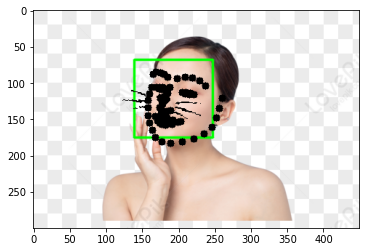

In [13]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 원본 이미지에 스티커 적용

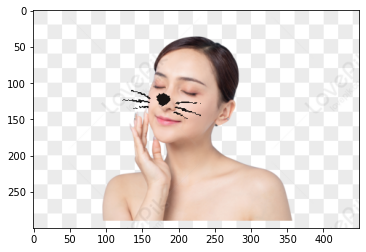

In [14]:
# 모든 얼굴에 대해 수염 적용
for refined_x, refined_y, img_sticker in zip(refined_xs, refined_ys, stickers):
    # 수염 이미지
    sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    # 스티커 마스크 생성 (스티커가 0인 부분만 적용)
    mask = img_sticker == 0

    # 혼합할 두 이미지 준비
    # img_sticker와 sticker_area가 같은 shape이어야 하므로 mask로 제한
    blended = cv2.addWeighted(sticker_area, 0.3, img_sticker, 0.7, 0)

    # sticker_area에서 마스크가 True인 부분만 blended 값으로 대체
    sticker_area[mask] = blended[mask]

    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 수염 이미지를 덮어 씌운 이미지가 나오게 된다.

plt.show()

## 개선사항
1. lms 코드를 그대로 이용하면 고양이 수염을 투명으로 인식하는 오류가 있어 해결함.
2. 사진에 얼굴이 2명 이상인 경우, 얼굴은 모두 인식하지만 스티커는 하나의 얼굴에만 적용되던 문제 해결함.
3. 고양이 수염이 너무 진해 얼굴을 너무 가리는 문제를 cv2.cvtColor()로 보완함.
4. 얼굴의 기울기에 따른 수염 길이, 수염 회전 구현함.

## 위 코드의 문제점
1. 얼굴 각도가 비스듬한 경우, 수염은 얼굴의 표면을 따라 비스듬해지지 않아 어색함.(side_face.png로 확인) -> 해결
2. 멀리서 촬영한 경우, 얼굴이 너무 작아져 얼굴 탐지 자체를 못하는 문제가 발생함.(far_face.png로 확인)
3. 얼굴의 위치 중 코 끝 바로 윗부분 랜드마크 위치에 고양이 코가 위치하도록 조절했는데, 얼굴의 크기나 각도에 따라 자연스러운 위치일 때도 있고, 자연스럽지 못한 경우도 있음.(image.png와 side_face.png 비교를 통해 확인)
4. 얼굴 각도에 맞게 수염을 회전할 경우, 수염의 해상도가 너무 낮아 수염이 사라지는 문제가 가끔 발생함.

## 노드 질문에 대한 대답
1. 실행 속도가 중요할까?
- 실행 속도가 빠를수록 실제 카메라 앱에서 자연스럽게 스티커가 얼굴에 붙어있을 수 있을 것이다. 위 코드처럼 하나의 사진에 스티커를 붙이는 용도라면 중요하지 않을 수 있지만, 단순히 사진 위에 스티커를 붙이는 것은 사람이 직접 해도 오래 걸리지 않는 문제이므로 실행 속도를 높여 카메라 앱에 적용하는 것이 중요하다고 볼 수 있다.
2. 정확도가 중요할까?
- 일정 수준 이상의 정확도는 당연히 중요하다. 사람이 봐도 얼굴이 아닌 부분을 트래킹하는 스티커 앱은 존재 의의가 매우 떨어질 것이다. 하지만 사람이 봐도 구분하기 어려운 사진에 대한 정확도는 크게 중요하지 않을 수 있다. 엑스레이 사진을 분석하는 인공지능은 사람이 발견하기 어려운 문제에 대해서도 정확도가 높아야 하지만, 스티커 앱의 경우 일정 수준 이상의 정확도만 보장되면 인간 이상의 높은 정확도는 중요한 문제가 아니라고 생각한다.